* #################################################
* 2024 공공데이터분석 중간고사 002분반 2024.04.26 (금)
* #################################################

In [1]:
##################################################
############### 문제 풀기 전 주의사항 ##############
##################################################

# 시험시간 내 인터넷 사용 금지, 시험문제 다운로드, 업로드 시에만 가능
# (시험 중, 핸드폰이나 인터넷 사용을 포함한 부정행위 적발시 0점 처리).

# 캔버스에서 1) ipynb 시험파일, 2) html 시험파일, 3) 데이터를 다운로드.
 
# html 파일의 실행결과를 참고하여, ipynb 파일의 #=== 코드작성 ===# 부분에 코드를 작성
# (ipynb파일의 실행결과는 코드 작성과정에서 사라질 수 있음).

# 맨 위의 import 셀을 우선 실행.
# 랜덤 값을 입력으로하는 문제는 주어진 실행결과와 다른 실행결과가 나올 수 있음.

# 코드는 다른 값을 갖는 데이터에서도 동작을 해야만 정답으로 인정
# (주어진 데이터 값 자체를 가지고 결과를 만들면 오답 처리)

# 시험 도중 anaconda prompt (검은창) 지우지 말것.
# 시험 중간중간에 파일 저장 (crtl+s) 할 것.

# 시험이 끝나면 실행결과를 모두 확인하고 작성한 ipynb 파일 저장 후,
# 작성한 ipynb을 < 캔버스 --> 과제 --> 중간고사> 에 업로드.
# (시스템 문제로 캔버스제출이 아닌 이메일로 제출하는 경우 ipynb 시험 파일은 파일명 수정하여 제출:
#    --> 이름_학번_2024중간고사_공공데이터분반00x.ipynb)

In [26]:
# 사용할 패키지를 import합니다
import sys
print('python', sys.version)

import numpy as np
print('numpy', np.__version__)

import pandas as pd
print('pandas', pd.__version__)

import matplotlib as mpl
print('matplotlib', mpl.__version__)

import matplotlib.pyplot as plt

import seaborn as sns
print('seaborn', sns.__version__)

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# figure에 한글 폰트 사용을 위한 코드
# plt.rc("font", family="Malgun Gothic") # window
plt.rc("font", family="AppleGothic") # mac
from matplotlib.ticker import MaxNLocator

python 3.13.1 (main, Dec  3 2024, 17:59:52) [Clang 16.0.0 (clang-1600.0.26.4)]
numpy 2.2.5
pandas 2.2.3
matplotlib 3.10.1
seaborn 0.13.2


# 문제1
* sr1의 주어진 각 값을 아래 조건에 맞게 변환한 sr1a를 출력하시오
* 1) 정수형은 그대로
* 2) 문자형은 쉼표제거 후 1) 숫자로만 구성시 정수로 변환 2) 숫자로만 구성 아닐 시 'X'
* (단 sr1의 값은 정수형과 문자형 밖에 없음)

In [5]:
sr1=pd.Series([1000, '2,000', 3500, '4,500k','5,500'])
sr1

def func_prob1(x):
    ## 코드 작성 ##
    if type(x) == int: return x
    x = x.replace(',','')
    if x.isdigit():
        return int(x)
    else:
        return 'X'

sr1a=sr1.map(func_prob1)
sr1a

0      1000
1     2,000
2      3500
3    4,500k
4     5,500
dtype: object

0    1000
1    2000
2    3500
3       X
4    5500
dtype: object

# 문제2
* 주어진 df2에 'A' column을 제거한 df2a를 출력하시오
* df2의 column은 랜덤하게 생성이 됨
* column에 'A'가 있는 경우는 'A'를 제거하고, 'A'가 없는 경우는 경우는 에러가 나지 않고 원래 dataframe이 그대로 나오게 함
* (힌트: drop 함수 사용)

In [98]:
df2=pd.DataFrame(np.arange(20).reshape(4,5),
                 columns=np.random.choice(list('ABCDEFGHIJK'), size=5, replace=False))
df2

## 코드 작성 ##
df2a = df2.drop(columns='A', errors='ignore')
df2a

,I,G,J,E,C
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


,I,G,J,E,C
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [97]:
## column에 A 가 있는 경우

,D,B,A,I,J
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


,D,B,I,J
0,0,1,3,4
1,5,6,8,9
2,10,11,13,14
3,15,16,18,19


In [96]:
## column에 A 가 없는 경우

,F,G,J,C,D
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


,F,G,J,C,D
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


# => 문제를 위한 전처리 코드
* ########################################
* df_last => 전처리 => df_prep 
* 아래 문제들에서 df_prep 사용됨
* ########################################

In [18]:
df_last = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','

### 1) '분양가격(제곱미터)'column: nan(결측치) 제거
df_prep=df_last.loc[df_last['분양가격(제곱미터)'].notnull()]

### 2) '분양가격(제곱미터)'column: 숫자로 구성된 문자 -> float형, 숫자가 아닌 문자 -> nan으로 변경 후 행 제거
df_prep=df_prep.copy()
df_prep['분양가격(제곱미터)']=pd.to_numeric(df_prep['분양가격(제곱미터)'], errors='coerce')
df_prep=df_prep.loc[df_prep['분양가격(제곱미터)'].notnull()]

### 3) 평당분양가격 column 추가
df_prep["평당분양가격"]=df_prep['분양가격(제곱미터)'] * 3.3

### 4) 전용면적 column 추가
def area_prep(x):
    x2=x.replace("모든면적","전체").replace("전용면적", "").replace("제곱미터", "").replace("60이하", "~60")
    x3=x2.replace("60이하", "~60").replace("초과", "~").replace("이하", "").replace(" ", "")
    return x3

df_prep["전용면적"] = df_prep["규모구분"].map(area_prep)

### 5) 필요없는 column 제거
df_prep=df_prep.drop(columns=['규모구분','분양가격(제곱미터)'], errors='ignore')

df_prep.head()


,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,전체
1,서울,2015,10,18651.6,~60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~


# 문제3
* 주어진 df3의 지역별 평당분양가격 최소값을 담은 dataframe df3a를 구하시오
* (주의: datatype이 dataframe)

In [99]:
df3=df_prep.loc[df_prep['지역명'].isin(['서울','대전','대구','부산'])].copy()

## 코드 작성 ##

#df3a=pd.DataFrame(df3.groupby('지역명')['평당분양가격'].min())
df3a = df3.pivot_table(index='지역명', values='평당분양가격', aggfunc='min')
df3a

,평당분양가격
지역명,
대구,8259.9
대전,8002.5
부산,9669.0
서울,16701.3


# 문제4
* 주어진 df4의 "전용면적" 별로, 가장 높은 평당분양가격과 두번째로 높은 평당분양가격의 차이를 갖는 series sr4를 구하시오
* 단, sr4은 순서가 값이 작은 것부터 큰 값 순서로 sorting되게 하시오

In [24]:
df4=df_prep.copy()

## 코드 작성 ##
def f(sr):
    sr = sr.sort_values(ascending=False)
    return sr.iloc[0] - sr.iloc[1]
    
sr4 = df4.groupby("전용면적")["평당분양가격"].apply(f).sort_values()
sr4

전용면적
85~102       0.0
~60          0.0
전체         102.3
60~85      181.5
102~      3488.1
Name: 평당분양가격, dtype: float64

# 문제5
* 주어진 df5에서 "지역"별로, 평당분양가격 평균과 중앙값을 구하고, 그 두 값을 다중 그래프로 그리시오
* pandas plot을 사용하시오
* 단, 다중bar의 순서는 왼쪽부터 평균-중앙값 순서로 하시오
* 레전드에 들어가는 label이 결과 그림처럼 되게 하시오
* (검은색 평행선은 결과확인용으로 무시해도 됨)

<Axes: xlabel='지역명'>

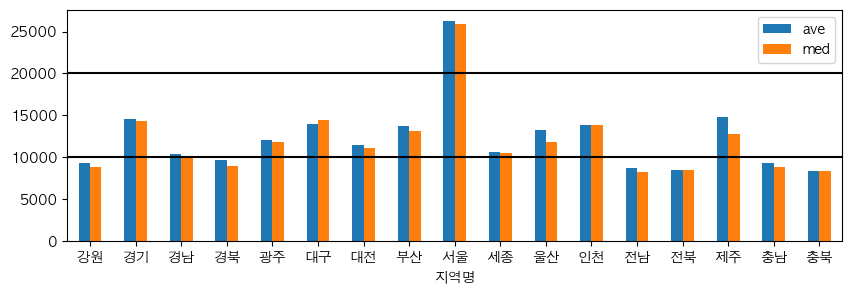

In [29]:
fig=plt.figure(figsize=(10,3))
ax1 = fig.subplots()

df5=df_prep.copy()
## 코드작성 ##
def f(sr):
    mean = sr.mean()
    median = sr.median()
    return pd.Series([mean, median], index = ['ave.', 'med.'])
df5.groupby('지역명')['평당분양가격'].apply(f).unstack().plot.bar(ax=ax1, rot=0)

ax1.axhline(y=10000, color='k')
ax1.axhline(y=20000, color='k')

# 문제6
* 주어진 df6을 가지고, 지역별 전용면적별 평당분양가격의 "최소값"을 bar그래프로 그리시오
* pandas plot을 활용하여 ax1에 그리시오
* (단, 다중그래프의 순서를 ['\~60', '60\~85', '85\~102','102\~', '전체']로 하시오)
* (검은색 평행선은 결과확인용으로 무시해도 됨)

# 문제7
* 주어진 df7을 가지고 전용면적별 연도별 평당분양가격의 "최대값"을 bar그래프로 그리시오
* seaborn 활용하여 ax2에 그리시오 (errorbar=None)
* (검은색 평행선은 결과확인용으로 무시해도 됨)

<Axes: xlabel='지역명'>

<Axes: xlabel='연도', ylabel='평당분양가격'>

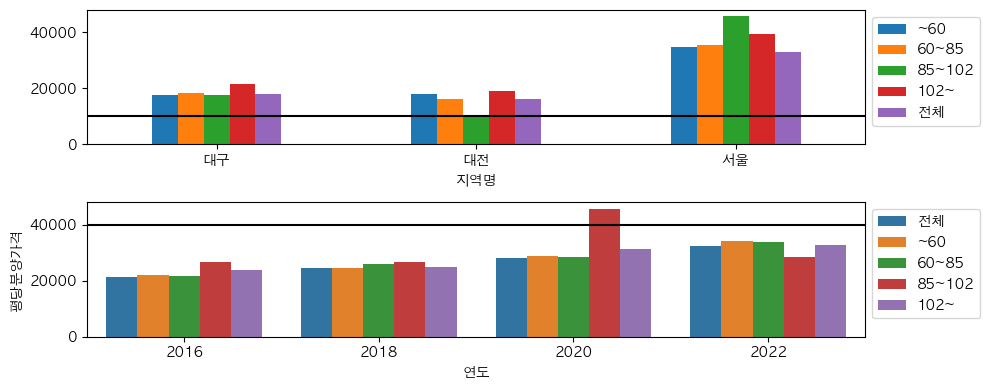

In [106]:
fig=plt.figure(figsize=(10, 4))
ax1, ax2=fig.subplots(2,1)
 
####### ax1
df6=df_prep.loc[df_prep['지역명'].isin(['서울','대전','대구'])].copy()
## 코드작성
# pivot_table 이용방법
df6=df6.pivot_table(index='지역명', columns='전용면적', values='평당분양가격', aggfunc='max')
df6[['~60', '60~85', '85~102','102~', '전체']].plot.bar(ax=ax1, rot=0)
# df_conc = pd.DataFrame()
# for n1 in ['~60', '60~85', '85~102','102~', '전체']:
#     sr = df6.loc[df6['전용면적']==n1].groupby('지역명')['평당분양가격'].min()
#     sr.name = n1
#     df_conc = pd.concat([df_conc, sr], axis=1)
# df_conc.plot.bar(ax=ax1, rot=0)
####### ax2
df7=df_prep.loc[df_prep['연도'].isin([2016, 2018, 2020, 2022])].copy()
## 코드작성
sns.barplot(data=df7, x='연도', y='평당분양가격', hue='전용면적', estimator='max', errorbar=None, ax=ax2)

_=ax1.axhline(y=10000, color='k')
_=ax1.legend(bbox_to_anchor=(1,1), loc='upper left')
_=ax2.axhline(y=40000, color='k')
_=ax2.legend(bbox_to_anchor=(1,1), loc='upper left')
fig.tight_layout()

# 문제8
* 주어진 df8에서 "최대값"과 "중앙값"이 가장많이 차이 나는 연도 top 3의 평당분양가격을 boxplot으로 그리시오
* pandas plot을 이용하여 그리시오

<Axes: >

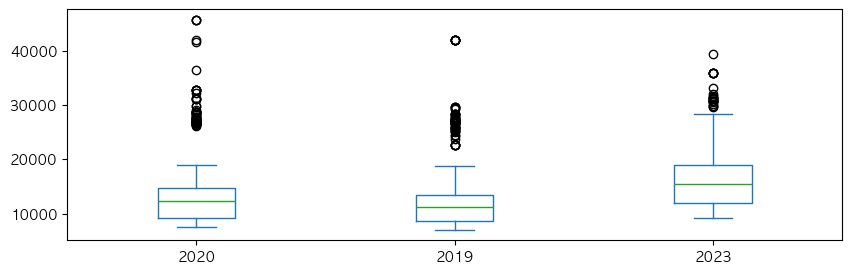

In [115]:
fig=plt.figure(figsize=(10,3))
ax1 = fig.subplots()

df8=df_prep.copy()

## 코드작성
# def f(sr):
#     return abs(sr.max() - sr.median())
# selected_year = df8.groupby('연도')['평당분양가격'].apply(f).sort_values(ascending=False).index[:3]
# df8.loc[df8['연도'].isin(selected_year)].groupby('연도')['평당분양가격'].apply(pd.DataFrame)[selected_year].plot.box(ax=ax1)
def get_diff(sr):
    return abs(sr.max()-sr.median())
df_pivot = df8.pivot_table(index=['지역명', '월', '전용면적'], columns="연도", values="평당분양가격")
diff = df8.groupby('연도')['평당분양가격'].apply(get_diff).sort_values(ascending=False)
df_pivot[diff.index[:3]].plot.box(ax=ax1)

# 문제9
* 주어진 df9를 가지고 ax1에 barplot을 그렸다. (errorbar=('ci',40))
* 그 아래에는 ax1과 같은 errorbar를 ax2에 직접 추가하는 코드를 작성했다.
* 그러나 결과가 다르게 나왔다. seaborn의 (errorbar=('ci',40))를 제대로 구현할수 있도록 코드를 수정하시요
* 단, for ii in range(200): (<== 이 코드는 수정하지 마시오)

<Axes: xlabel='연도', ylabel='평당분양가격'>

<Axes: xlabel='연도', ylabel='평당분양가격'>

,up,lw
연도,,
2016,9830.270732,9557.826220
2017,10499.022769,10262.279077
2018,11096.984331,10841.821436
2019,12398.139803,11996.538487
2020,13264.346259,12855.142517


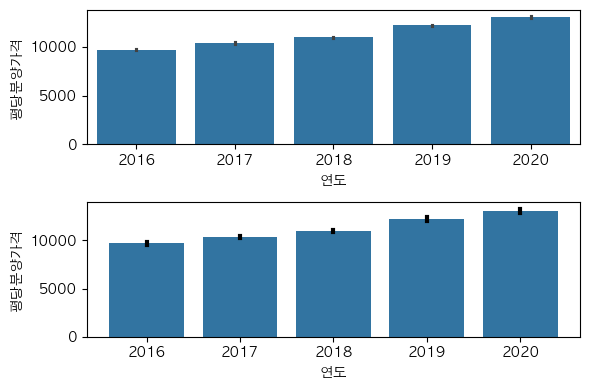

In [118]:
fig=plt.figure(figsize=(6, 4))
ax1, ax2=fig.subplots(2,1)

df9=df_prep.loc[df_prep['연도'].isin([2016, 2017, 2018, 2019, 2020])].copy()

sns.barplot(data=df9,
            x='연도', # group
            y="평당분양가격",
            errorbar=('ci',40), # bootstraping confidence interval: 5~95 
            ax=ax1)

sns.barplot(data=df9,
            x='연도', # group
            y="평당분양가격",
            errorbar=None,
            ax=ax2)

######### 이 아래부터 수정 가능 ##########
def get_errorbar_ci(sr1):
    bs_list=[]
    for ii in range(200): # <== 이 코드는 수정하지 마시오
        sr2=sr1.sample(len(sr1), replace=True)
        bs_list.append(sr2.mean())
    sr_sorted=pd.Series(bs_list).sort_values(ascending=False)
    upper=sr_sorted.iloc[29]
    lower=sr_sorted.iloc[-30]
    return pd.Series([upper, lower], index=['up','lw'])

ci_res=df9.groupby('연도')['평당분양가격'].apply(get_errorbar_ci)
ci_res=ci_res.unstack(1)
ci_res

for x_pos, ind in zip(ax2.get_xticks(), ci_res.index):
    up_pos=ci_res.loc[ind, 'up']
    lw_pos=ci_res.loc[ind, 'lw']
    
    _=ax2.plot([x_pos,x_pos],[lw_pos, up_pos], color='k', linewidth=3)
    
fig.tight_layout()

# 문제10
* dataframe df10a를 적당한 format으로 변경한후 df10b와 연결하여 df10d를 만드시오

In [68]:
df10a = pd.DataFrame({"name": ['A','B','C'],
                      "age": [30,40,50],
                      "mat": [130, 150,140],
                      "eng": [330, 350,340],
                      "kor": [530, 550,540]})

df10b = pd.DataFrame({"age": [10,20,30],
                      "name": ['D','E','F'],
                      "subj": ['eng','eng','eng'],
                      "score": [310, 390,400]})

df10a
df10b

## 코드작성
df10a_melted = df10a.melt(id_vars=["name","age"],value_vars=["eng"],value_name="score", var_name="subj")
df10d = pd.concat([df10a_melted,df10b], axis=0)
print("### df10d")
df10d

,name,age,mat,eng,kor
0,A,30,130,330,530
1,B,40,150,350,550
2,C,50,140,340,540


,age,name,subj,score
0,10,D,eng,310
1,20,E,eng,390
2,30,F,eng,400


### df10d


,name,age,subj,score
0,A,30,eng,330
1,B,40,eng,350
2,C,50,eng,340
0,D,10,eng,310
1,E,20,eng,390
2,F,30,eng,400


# => 문제를 위한 전처리 코드
* ########################################
* df_last, df_first => 전처리 => df_all
* 아래 문제들에서 df_all 사용됨
* ########################################

In [69]:
###########################################
############ df_last (df_prep1) ############
###########################################
df_last = pd.read_csv("data/전국평균 분양가격 (2015년10월~2023년6월).csv", encoding="cp949") #default: sep=','

### 1) '분양가격(제곱미터)'column: nan(결측치) 제거
df_prep1=df_last.loc[df_last['분양가격(제곱미터)'].notnull()]

### 2) '분양가격(제곱미터)'column: 숫자로 구성된 문자 -> float형, 숫자가 아닌 문자 -> nan으로 변경 후 행 제거
df_prep1=df_prep1.copy()
df_prep1['분양가격(제곱미터)']=pd.to_numeric(df_prep1['분양가격(제곱미터)'], errors='coerce')
df_prep1=df_prep1.loc[df_prep1['분양가격(제곱미터)'].notnull()]

### 3) 평당분양가격 column 추가
df_prep1["평당분양가격"]=df_prep1['분양가격(제곱미터)'] * 3.3

### 4) 전용면적 column 추가
def area_prep(x):
    x2=x.replace("모든면적","전체").replace("전용면적", "").replace("제곱미터", "").replace("60이하", "~60")
    x3=x2.replace("60이하", "~60").replace("초과", "~").replace("이하", "").replace(" ", "")
    return x3

df_prep1["전용면적"] = df_prep1["규모구분"].map(area_prep)

### 5) 필요없는 column 제거
df_prep1=df_prep1.drop(columns=['규모구분','분양가격(제곱미터)'], errors='ignore')

### 6) 전용면적 '전체' 선택 후, 전용면적 drop
df_prep1=df_prep1.loc[df_prep1['전용면적']=='전체'] # df_first가 전용면적 별 데이터가 없음으로 전체만 선택
df_prep1=df_prep1.drop(columns='전용면적', errors='ignore')

############################################
############ df_first (df_prep12) ###########
############################################

df_first = pd.read_csv("data/전국평균 분양가격 (2013년12월~2015년8월).csv", encoding="cp949")
df_first_melt = df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")
df_first_melt.rename(columns={'지역':"지역명"}, inplace=True)

df_first_melt['연도']=df_first_melt['기간'].str.split('년').str.get(0).astype(int)
df_first_melt['월']=df_first_melt['기간'].str.split('년').str.get(1)
df_first_melt['월']=df_first_melt['월'].str.replace('월','').astype(int)
df_prep12=df_first_melt.drop(columns='기간')

###############################################
#################### df_all ###################
###############################################

## concat
df_all=pd.concat((df_prep1, df_prep12), axis=0)
## reset_index
df_all=df_all.reset_index(drop=True)

df_all

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
1,인천,2015,10,10437.9
2,경기,2015,10,10355.4
3,부산,2015,10,10269.6
4,대구,2015,10,8850.6
...,...,...,...,...
1918,전북,2015,8,6580.0
1919,전남,2015,8,6289.0
1920,경북,2015,8,7037.0
1921,경남,2015,8,7665.0


# 문제11
* 주어진 df11을 가지고 연도별 평당분양가격을 boxplot으로 그리시오
* seaborn 사용
* 단, 각 연도별 평당분양가격 최대값이 높은 순서로 sorting 하여 나타내시오

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
1,인천,2015,10,10437.9
2,경기,2015,10,10355.4
3,부산,2015,10,10269.6
4,대구,2015,10,8850.6
...,...,...,...,...
1918,전북,2015,8,6580.0
1919,전남,2015,8,6289.0
1920,경북,2015,8,7037.0
1921,경남,2015,8,7665.0


<Axes: xlabel='연도', ylabel='평당분양가격'>

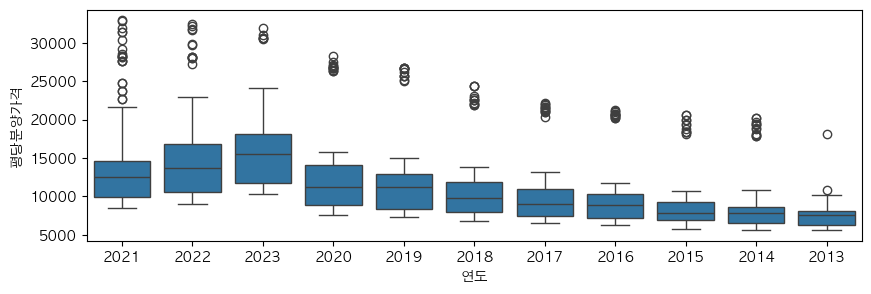

In [70]:
fig=plt.figure(figsize=(10,3))
ax1 = fig.subplots()

df11=df_all.copy()
df11
## 코드작성
sns.boxplot(
    data=df11, 
    x='연도', 
    y='평당분양가격', 
    order=df11.groupby('연도')['평당분양가격'].max().sort_values(ascending=False).index, 
    ax=ax1
)

# 문제12
* 주어진 df12에서 집값이 가장 많이 변하지 않은 지역의 연월 그래프를 결과 그림과 같이 그리시오
* 집값이 많이 변하는 정도의 기준: mx1 - mn1
* mx1: df12의 연월 평당분양가격 중 최대값
* mn1: df12의 연월 평당분양가격 중 최소값
* 집값이 가장 많이 변하지 않은 지역으로 결정된 지역을 제목에 넣으시오

<Axes: xlabel='연도', ylabel='평당분양가격'>

Text(0.5, 1.0, '충북')

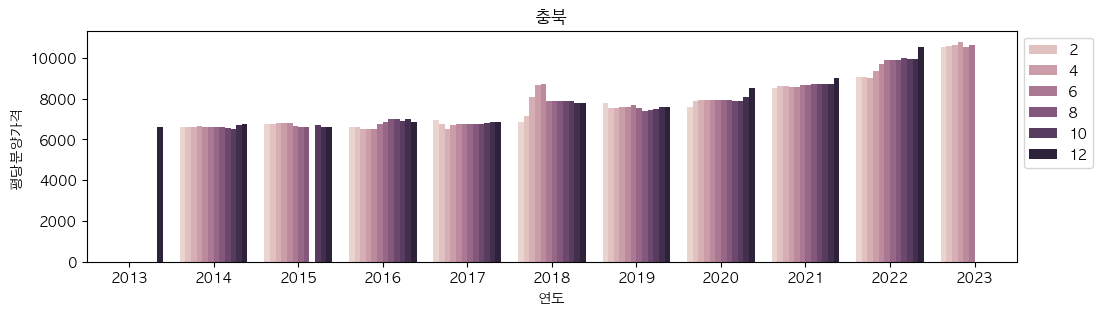

In [83]:
fig=plt.figure(figsize=(12,3), dpi=100)
ax1=fig.subplots()

df12=df_all.copy()

## 코드작성
def f(sr):
    return sr.max() - sr.min()
region = df12.groupby('지역명')['평당분양가격'].apply(f).sort_values().index[0]
sns.barplot(
    data=df12.loc[df12['지역명']==region],
    x='연도',
    y='평당분양가격',
    hue='월'
)
ax1.set_title(region)
_=ax1.legend(bbox_to_anchor=(1,1), loc='upper left')